# **UrbanWear - Análise de Vendas**

## **Funções e bibliotecas necessárias para o projeto**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

## **Iniciando o projeto utilizando a metodologia CRISP-DM**

### **1.0 - Entendimento do Negócio**

#### **Contextualização**

A UrbanWear é uma empresa fictícia do setor de moda que atua tanto em lojas físicas quanto em e-commerce.
Nos últimos anos, o mercado de vestuário tem passado por transformações significativas devido ao avanço do comércio online, mudanças no comportamento do consumidor e aumento da concorrência digital.

A direção da empresa busca entender:

O desempenho histórico das vendas entre 2018 e 2024.

O impacto do crescimento do e-commerce em comparação à loja física.

A evolução do ticket médio e da participação percentual de cada canal.

Essas informações são fundamentais para apoiar decisões estratégicas sobre investimentos, expansão digital e manutenção da relevância das lojas físicas.

#### **Objetivo:**

Compreender o comportamento de vendas da UrbanWear entre 2018 e 2024 e apoiar decisões estratégicas.

#### **Questões de negócio:**
1. Qual canal de vendas apresentou maior taxa de crescimento?
2. Existe risco da loja física perder relevância diante do online?
3. Qual o ticket médio por canal?

### **2.0 - Entendimento dos Dados**

#### **Sobre os Dados**

Dados disponíveis na própria pasta do projeto na subpasta /data

#### **Descrição das Colunas**

**Data**

Data em que as vendas foram registradas. Essa coluna é fundamental para análises temporais, como identificar sazonalidade, tendências e variações mensais/anuais.

**Canal**

Representa o canal de vendas utilizado (ex.: Loja Física, E-commerce, Parceiros, etc.). Essencial para avaliar a performance de cada canal e identificar mudanças no comportamento de compra dos clientes.

**Região**

Região geográfica onde a venda foi realizada. Essa variável permite análises geográficas, ajudando a entender onde estão os maiores mercados e oportunidades de expansão.

**Quantidade_Vendas**

Número de unidades vendidas em determinada transação ou período. Permite medir volume de vendas e cruzar com a receita para entender ticket médio e lucratividade.

**Receita_Bruta**

Valor monetário bruto das vendas (em reais). É a métrica principal de desempenho financeiro e permite mensurar crescimento, lucratividade e eficiência dos canais e regiões.



#### **Coletando os dados**

In [2]:
df = pd.read_csv(r'data/urbanwear_sales.csv', sep=',')
df.head()

,Data,Canal,Região,Quantidade_Vendas,Receita_Bruta
0,2018-01-01,Loja Física,Nordeste,83,6862.82
1,2018-01-01,E-commerce,Sudeste,26,1913.43
2,2018-01-01,E-commerce,Norte,156,13075.65
3,2018-01-01,Loja Física,Sudeste,48,3674.25
4,2018-01-01,Loja Física,Nordeste,64,5158.49


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data               840 non-null    object 
 1   Canal              840 non-null    object 
 2   Região             840 non-null    object 
 3   Quantidade_Vendas  840 non-null    int64  
 4   Receita_Bruta      840 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.9+ KB


In [4]:
print(f"{df.duplicated().sum() / df['Data'].count():.2%} do Dataframe possui registros duplicados")

0.00% do Dataframe possui registros duplicados


In [5]:
df.isna().sum()

Data                 0
Canal                0
Região               0
Quantidade_Vendas    0
Receita_Bruta        0
dtype: int64

**Diagnóstico de qualidade dos dados**

    Não há valores ausentes ou nulos.

    Não Existem duplicados

**Resumo estatístico das variáveis (numéricas e categóricas)**

In [6]:
# Variáveis numéricas
display(df.describe().T)
        
# Variáveis categóricas
display(df.describe(include=['object']))

,count,mean,std,min,25%,50%,75%,max
Quantidade_Vendas,840.0,126.044048,108.815123,13.00,53.7500,84.000,163.0000,720.00
Receita_Bruta,840.0,10448.790560,9271.022437,991.19,4346.4725,6934.985,13624.9275,62459.97


,Data,Canal,Região
count,840,840,840
unique,84,3,5
top,2018-01-01,Loja Física,Sudeste
freq,10,440,351


In [7]:
# Contagem de valores únicos em cada variável categórica
for col in ['Canal', 'Região']:
    print('---')
    print(df[col].value_counts())

---
Canal
Loja Física    440
E-commerce     359
Parceiros       41
Name: count, dtype: int64
---
Região
Sudeste         351
Nordeste        173
Sul             151
Centro-Oeste     88
Norte            77
Name: count, dtype: int64


In [8]:
# Garantindo que a coluna Data seja datetime
df["Data"] = pd.to_datetime(df["Data"])

# Criando colunas auxiliares de Ano e Mês
df["Ano"] = df["Data"].dt.year
df["Mes"] = df["Data"].dt.month

#### **Gráficos da análise exploratória dos dados**

In [9]:
# Configurações globais de cores dos gráficos
cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

**Distribuição das Variáveis Numéricas**

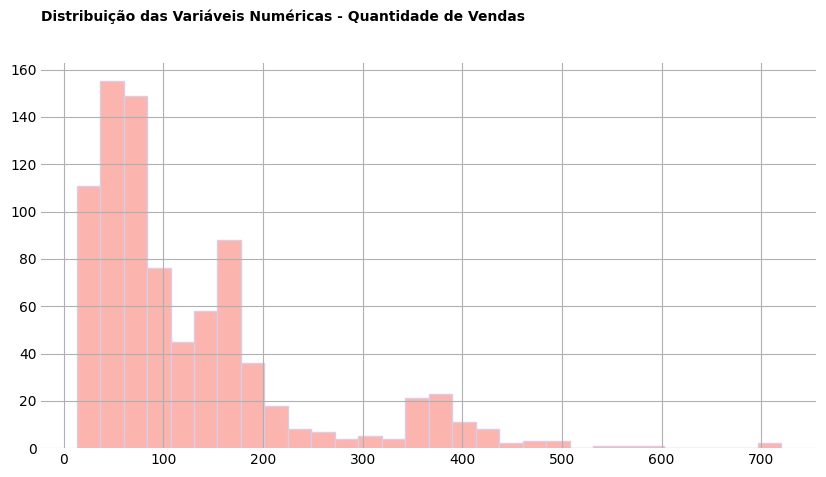

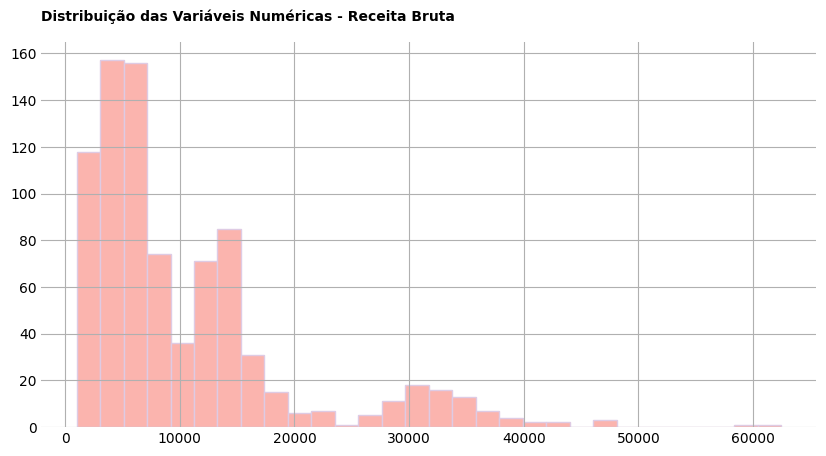

In [10]:
df['Quantidade_Vendas'].hist(bins=30, figsize=(10,5), edgecolor=cores[3])
plt.title('Distribuição das Variáveis Numéricas - Quantidade de Vendas', fontsize=10, fontweight='bold', pad=30, loc='left')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.show()

df['Receita_Bruta'].hist(bins=30, figsize=(10,5), edgecolor=cores[3])
plt.title('Distribuição das Variáveis Numéricas - Receita Bruta', fontsize=10, fontweight='bold', pad=15, loc='left')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.show()

**Análise dos gráficos de distrubuição das variáveis numéricas**

1. Quantidade_Vendas

    Média: 126 unidades por transação.

    Mediana: 84 unidades → mostra que metade das vendas são menores que esse valor.

   Desvio padrão: 108 → indica grande variabilidade nas quantidades vendidas.

    Mínimo: 13 unidades.

    Máximo: 720 unidades.

   Interpretação:

       A distribuição é assimétrica à esquerda (muitos valores baixos(esquerda) e poucos valores muito altos(direita)).

       Isso significa que a maioria dos clientes compra pequenas/médias quantidades, mas existem casos de compras em lote bem maiores (pode ser compra corporativa, promoção ou sazonalidade).

2. Receita_Bruta

    Média: R$ 10.449 por venda.

    Mediana: R$ 6.935 → valor bem abaixo da média, confirmando a assimetria positiva (algumas vendas muito grandes puxam a média para cima).

    Desvio padrão: R$ 9.271 → alto, mostrando grande dispersão entre os valores das vendas.

    Mínimo: R$ 991.

    Máximo: R$ 62.460.

    Interpretação:

        A maioria das transações gera receita entre R$ 4.000 e R$ 13.000 (faixa interquartílica).

        Existem algumas vendas extremamente altas, que funcionam como outliers positivos.

        Isso é comum em negócios de moda quando existem compras grandes para revenda, datas comemorativas (Black Friday, Natal) ou até coleções exclusivas.

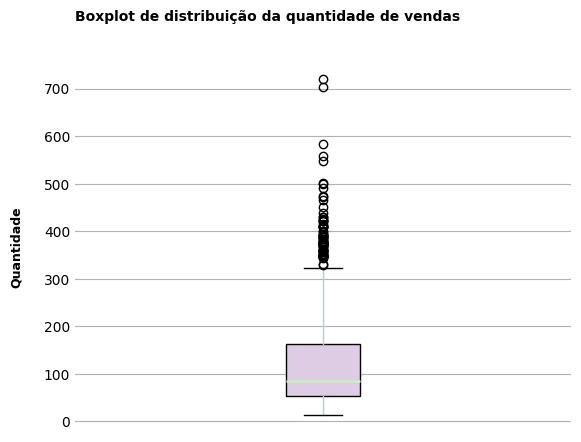

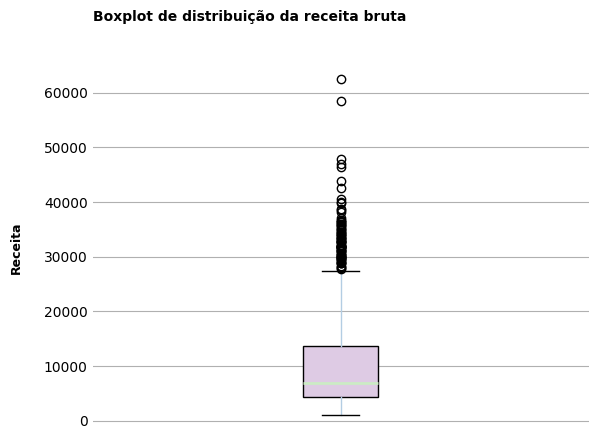

In [11]:
# Boxplots para variáveis numéricas
## Quantidade de Vendas
box = plt.boxplot(df['Quantidade_Vendas'], patch_artist=True)
plt.box(False)
plt.title('Boxplot de distribuição da quantidade de vendas', loc='left', fontsize=10, fontweight='bold', pad=30)
plt.tick_params(axis='both', length=0)
plt.ylabel('Quantidade', fontsize=9, fontweight='semibold', labelpad=15)
plt.xticks([])
plt.grid(True)

#Alterando a cor do Boxplot
for patch in box['boxes']:
    patch.set_facecolor(cores[3])   # cor de preenchimento

# Alterando a cor da mediana
for median in box['medians']:
    median.set_color(cores[2])
    median.set_linewidth(2)

# Alterando whiskers (extremidades)
for whisker in box['whiskers']:
    whisker.set_color(cores[1])
    
plt.show()

## Receita Bruta
box = plt.boxplot(df['Receita_Bruta'], patch_artist=True)
plt.box(False)
plt.title('Boxplot de distribuição da receita bruta', loc='left', fontsize=10, fontweight='bold', pad=30)
plt.tick_params(axis='both', length=0)
plt.ylabel('Receita', fontsize=9, fontweight='semibold', labelpad=15)
plt.xticks([])
plt.grid(True)

#Alterando a cor do Boxplot
for patch in box['boxes']:
    patch.set_facecolor(cores[3])   # cor de preenchimento

# Alterando a cor da mediana
for median in box['medians']:
    median.set_color(cores[2])
    median.set_linewidth(2)

# Alterando whiskers (extremidades)
for whisker in box['whiskers']:
    whisker.set_color(cores[1])
    
plt.show()

**Análise dos Boxplots**

1. Quantidade_Vendas

    O boxplot mostra que a maior parte das vendas está concentrada em valores menores (até cerca de 200 unidades).

    Existem outliers positivos bem destacados, indicando transações com quantidades muito maiores que a média.

    Esses outliers provavelmente correspondem a compras em lote (empresas, revendedores ou datas sazonais).

    **Insight:** Esses casos não devem ser removidos sem uma análise mais profunda, pois podem ser importantes para identificar picos de demanda em campanhas específicas.

2. Receita_Bruta

    Também apresenta muitos valores concentrados em uma faixa menor (até aproximadamente R$ 15.000).

    Existem outliers positivos de grande impacto, com receitas muito acima do restante (ex.: > R$ 40.000).

    Esses valores extremos podem distorcer métricas como a média → por isso, a mediana e o IQR (intervalo interquartílico) são mais adequados para análise.

    **Insight:** Esses outliers provavelmente refletem compras corporativas, coleções exclusivas ou períodos de promoções agressivas (como Black Friday).

In [12]:
df.columns

Index(['Data', 'Canal', 'Região', 'Quantidade_Vendas', 'Receita_Bruta', 'Ano',
       'Mes'],
      dtype='object')

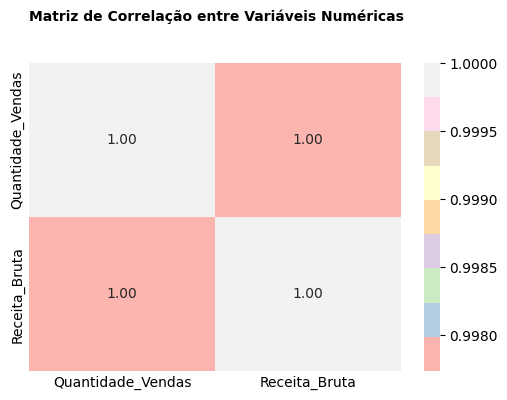

In [13]:
# Matriz de correlação
numeric_cols = ['Quantidade_Vendas','Receita_Bruta']
corr_matrix = df[numeric_cols].corr()

# Heatmap da correlação
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel1', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=10, fontweight='bold', pad=30, loc='left')
plt.tick_params(axis='both', length=0)
plt.show()

**Análise da Correlação**

A matriz de correlação deve mostrar uma forte relação positiva entre Quantidade_Vendas e Receita_Bruta.

Isso é esperado, pois quanto maior a quantidade vendida, maior tende a ser a receita bruta.

Porém, a correlação dificilmente será perfeita (1.0), já que o preço médio por unidade pode variar entre regiões, canais e promoções.

**Insight:** A correlação positiva confirma que o volume vendido é o principal driver de receita. Estratégias que aumentem a quantidade (promoções, kits, campanhas online) tendem a impulsionar diretamente o faturamento.

#### **Estatísticas Resumidas por Canal**

In [14]:
stats_por_canal = df.groupby('Canal')[['Quantidade_Vendas', 'Receita_Bruta']].describe()
print(stats_por_canal)

            Quantidade_Vendas                                            \
                        count        mean         std   min   25%   50%   
Canal                                                                     
E-commerce              359.0  131.935933  107.287448  18.0  56.5  91.0   
Loja Física             440.0  122.847727  111.956943  13.0  49.0  83.0   
Parceiros                41.0  108.756098   83.932348  19.0  52.0  77.0   

                          Receita_Bruta                                      \
               75%    max         count          mean          std      min   
Canal                                                                         
E-commerce   168.5  584.0         359.0  10975.165933  9177.258835  1450.45   
Loja Física  159.0  720.0         440.0  10164.403932  9508.586944   991.19   
Parceiros    160.0  409.0          41.0   8891.750488  7134.851574  1510.02   

                                                        
                 

In [15]:
df.groupby('Canal')['Região'].describe(include=['object'])

,count,unique,top,freq
Canal,,,,
E-commerce,359,5,Sudeste,136
Loja Física,440,5,Sudeste,195
Parceiros,41,5,Sudeste,20


#### **Analisando a distribuição de vendas separando por Canal (E-commerce vs Loja Física)**

**Histograma de Receita Bruta por Canal**

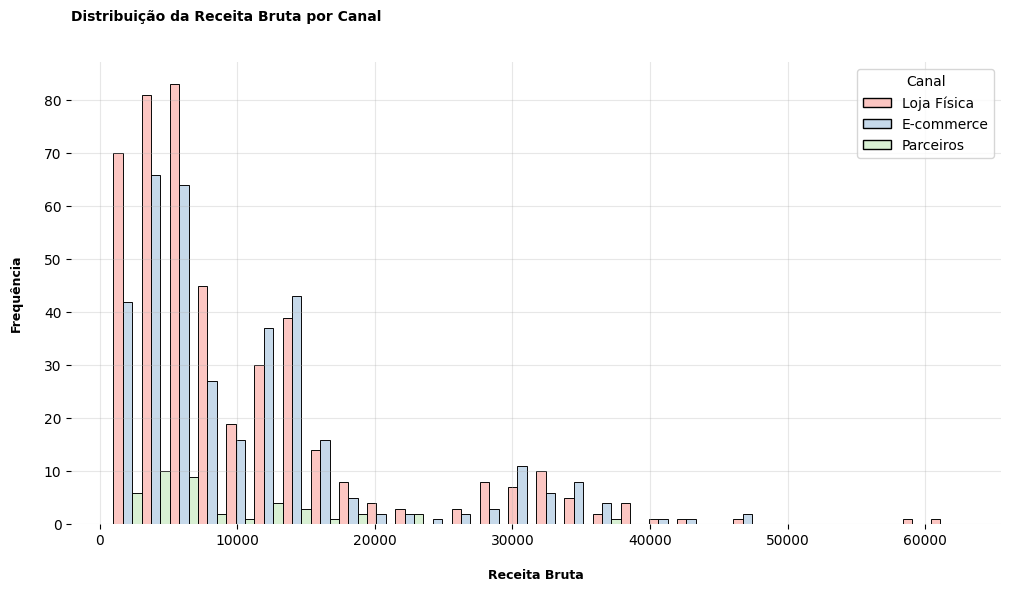

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=df, 
    x='Receita_Bruta', 
    hue='Canal', 
    bins=30, 
    kde=False,          # retirando as linhas, focando só nas barras
    multiple='dodge',   # barras lado a lado para diferenciar os canais
    palette='Pastel1'
)

plt.title('Distribuição da Receita Bruta por Canal', fontsize=10, fontweight='bold', loc='left', pad=30)
plt.xlabel('Receita Bruta', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Frequência', labelpad=15, fontsize=9, fontweight='semibold')
plt.grid(alpha=0.3)
plt.box(False)
plt.show()

**Análise do Histograma de Receita Bruta por Canal**

**Concentração em valores baixos:**

Tanto no E-commerce quanto na Loja Física, a maior parte das transações acontece em faixas baixas de Receita Bruta.

Isso sugere que a base de clientes é formada por muitas compras de menor valor, algo esperado em moda/vestuário.

**Diferença entre os canais:**

O E-commerce apresenta uma distribuição mais espalhada, com presença de alguns valores altos de receita, o que indica compras de maior ticket médio (como kits ou volumes maiores).

A Loja Física tende a ser mais concentrada em valores baixos e médios, sem tanta dispersão em compras de alto valor.

**Implicações de negócio:**

O E-commerce pode estar atraindo clientes que preferem compras maiores (possivelmente motivados por frete grátis, kits promocionais ou conveniência).

A Loja Física pode estar mais voltada para compras recorrentes e pontuais, de baixo valor, reforçando o papel de presença física e acessibilidade.

---

**Histograma de Quantidade de Vendas por Canal**

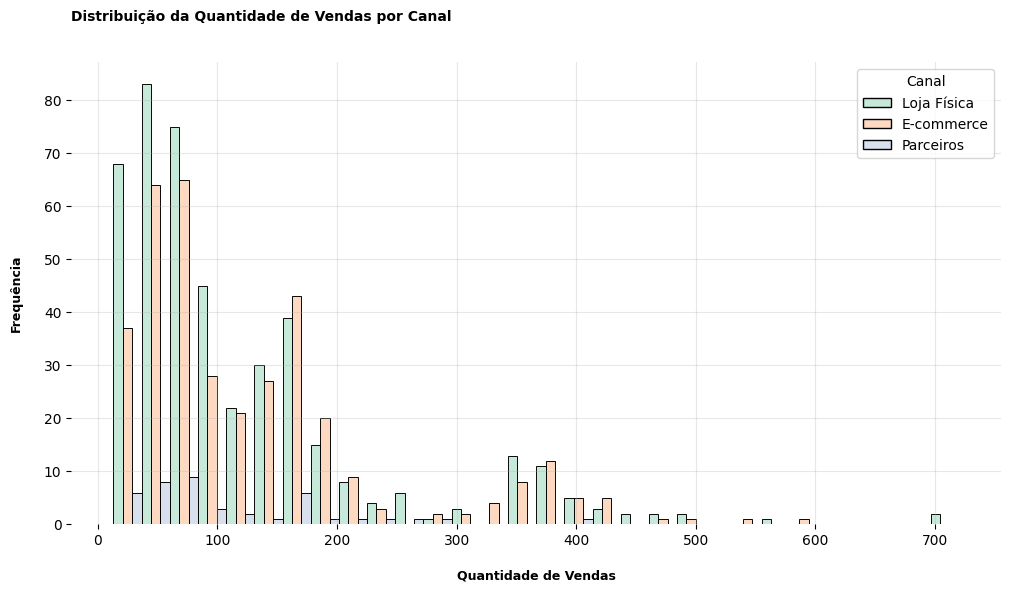

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=df, 
    x='Quantidade_Vendas', 
    hue='Canal', 
    bins=30, 
    kde=False,          # retirando as linhas, focando só nas barras
    multiple='dodge',   # barras lado a lado para diferenciar os canais
    palette='Pastel2'
)

plt.title('Distribuição da Quantidade de Vendas por Canal', fontsize=10, fontweight='bold', loc='left', pad=30)
plt.xlabel('Quantidade de Vendas', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Frequência', labelpad=15, fontsize=9, fontweight='semibold')
plt.grid(alpha=0.3)
plt.box(False)
plt.show()

**Concentração em faixas baixas de vendas**

A maior parte das observações em todos os canais (E-commerce, Loja Física e Parceiros) está concentrada em quantidades de vendas mais baixas.

Isso indica que, na média, a maior parte das transações envolve poucas unidades por venda.

**Diferenças entre os canais**

E-commerce: mostra uma distribuição mais espalhada, com presença em faixas mais altas de quantidade de vendas. Isso sugere que, online, os clientes estão mais propensos a comprar em volume (kits ou combos).

Loja Física: concentra-se ainda mais nas faixas baixas de quantidade, ou seja, vendas unitárias são predominantes — comportamento típico de compras presenciais e imediatas.

Parceiros: aparecem em posição intermediária, com distribuição semelhante ao E-commerce em alguns pontos, mas sem alcançar os volumes mais altos.

Implicações de negócio

O E-commerce é o canal mais favorável para incentivar kits promocionais e vendas em volume, já que o comportamento do cliente já aponta nessa direção.

A Loja Física poderia explorar estratégias de upsell no ponto de venda, como descontos progressivos (ex.: “Leve 3, pague 2”) para aumentar o ticket médio.

O canal de Parceiros pode ser otimizado com acordos comerciais que reforcem volumes maiores, já que ele tem potencial, mas ainda não apresenta o mesmo padrão de dispersão do E-commerce.